In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, classification_report
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error

In [2]:
# Loading the dataset 
df = pd.read_csv("/kaggle/input/ibm-hr-analytics-attrition-dataset/WA_Fn-UseC_-HR-Employee-Attrition.csv")

In [3]:
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

In [5]:
df.describe()

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,...,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,802.485714,9.192517,2.912925,1.0,1024.865306,2.721769,65.891156,2.729932,2.063946,...,2.712245,80.0,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.135373,403.509100,8.106864,1.024165,0.0,602.024335,1.093082,20.329428,0.711561,1.106940,...,1.081209,0.0,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,18.000000,102.000000,1.000000,1.000000,1.0,1.000000,1.000000,30.000000,1.000000,1.000000,...,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,465.000000,2.000000,2.000000,1.0,491.250000,2.000000,48.000000,2.000000,1.000000,...,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,802.000000,7.000000,3.000000,1.0,1020.500000,3.000000,66.000000,3.000000,2.000000,...,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,1157.000000,14.000000,4.000000,1.0,1555.750000,4.000000,83.750000,3.000000,3.000000,...,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,1499.000000,29.000000,5.000000,1.0,2068.000000,4.000000,100.000000,4.000000,5.000000,...,4.000000,80.0,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


In [6]:
df.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField', 'EmployeeCount',
       'EmployeeNumber', 'EnvironmentSatisfaction', 'Gender', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction',
       'MaritalStatus', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'Over18', 'OverTime', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
      dtype='object')

In [7]:
df.shape

(1470, 35)

In [8]:
# Checking for null values
df.isnull().sum()

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSince

From the above we can see that the data is clean from null values.

In [9]:
df_categorical_columns = df.select_dtypes(include=['object']).columns.tolist()
        
df_categorical_columns

['Attrition',
 'BusinessTravel',
 'Department',
 'EducationField',
 'Gender',
 'JobRole',
 'MaritalStatus',
 'Over18',
 'OverTime']

In [10]:
df_encoded = df.copy()

label_encoder = LabelEncoder()

for column in df_categorical_columns:
    df_encoded[column] = label_encoder.fit_transform(df_encoded[column])

df_encoded

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,1,2,1102,2,1,2,1,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,0,1,279,1,8,1,1,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,1,2,1373,1,2,2,4,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,0,1,1392,1,3,4,1,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,0,2,591,1,2,1,3,1,7,...,4,80,1,6,3,3,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,0,1,884,1,23,2,3,1,2061,...,3,80,1,17,3,3,5,2,0,3
1466,39,0,2,613,1,6,1,3,1,2062,...,1,80,1,9,5,3,7,7,1,7
1467,27,0,2,155,1,4,3,1,1,2064,...,2,80,1,6,0,3,6,2,0,3
1468,49,0,1,1023,2,2,3,3,1,2065,...,4,80,0,17,3,2,9,6,0,8


In [11]:
df_encoded.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField', 'EmployeeCount',
       'EmployeeNumber', 'EnvironmentSatisfaction', 'Gender', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction',
       'MaritalStatus', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'Over18', 'OverTime', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
      dtype='object')

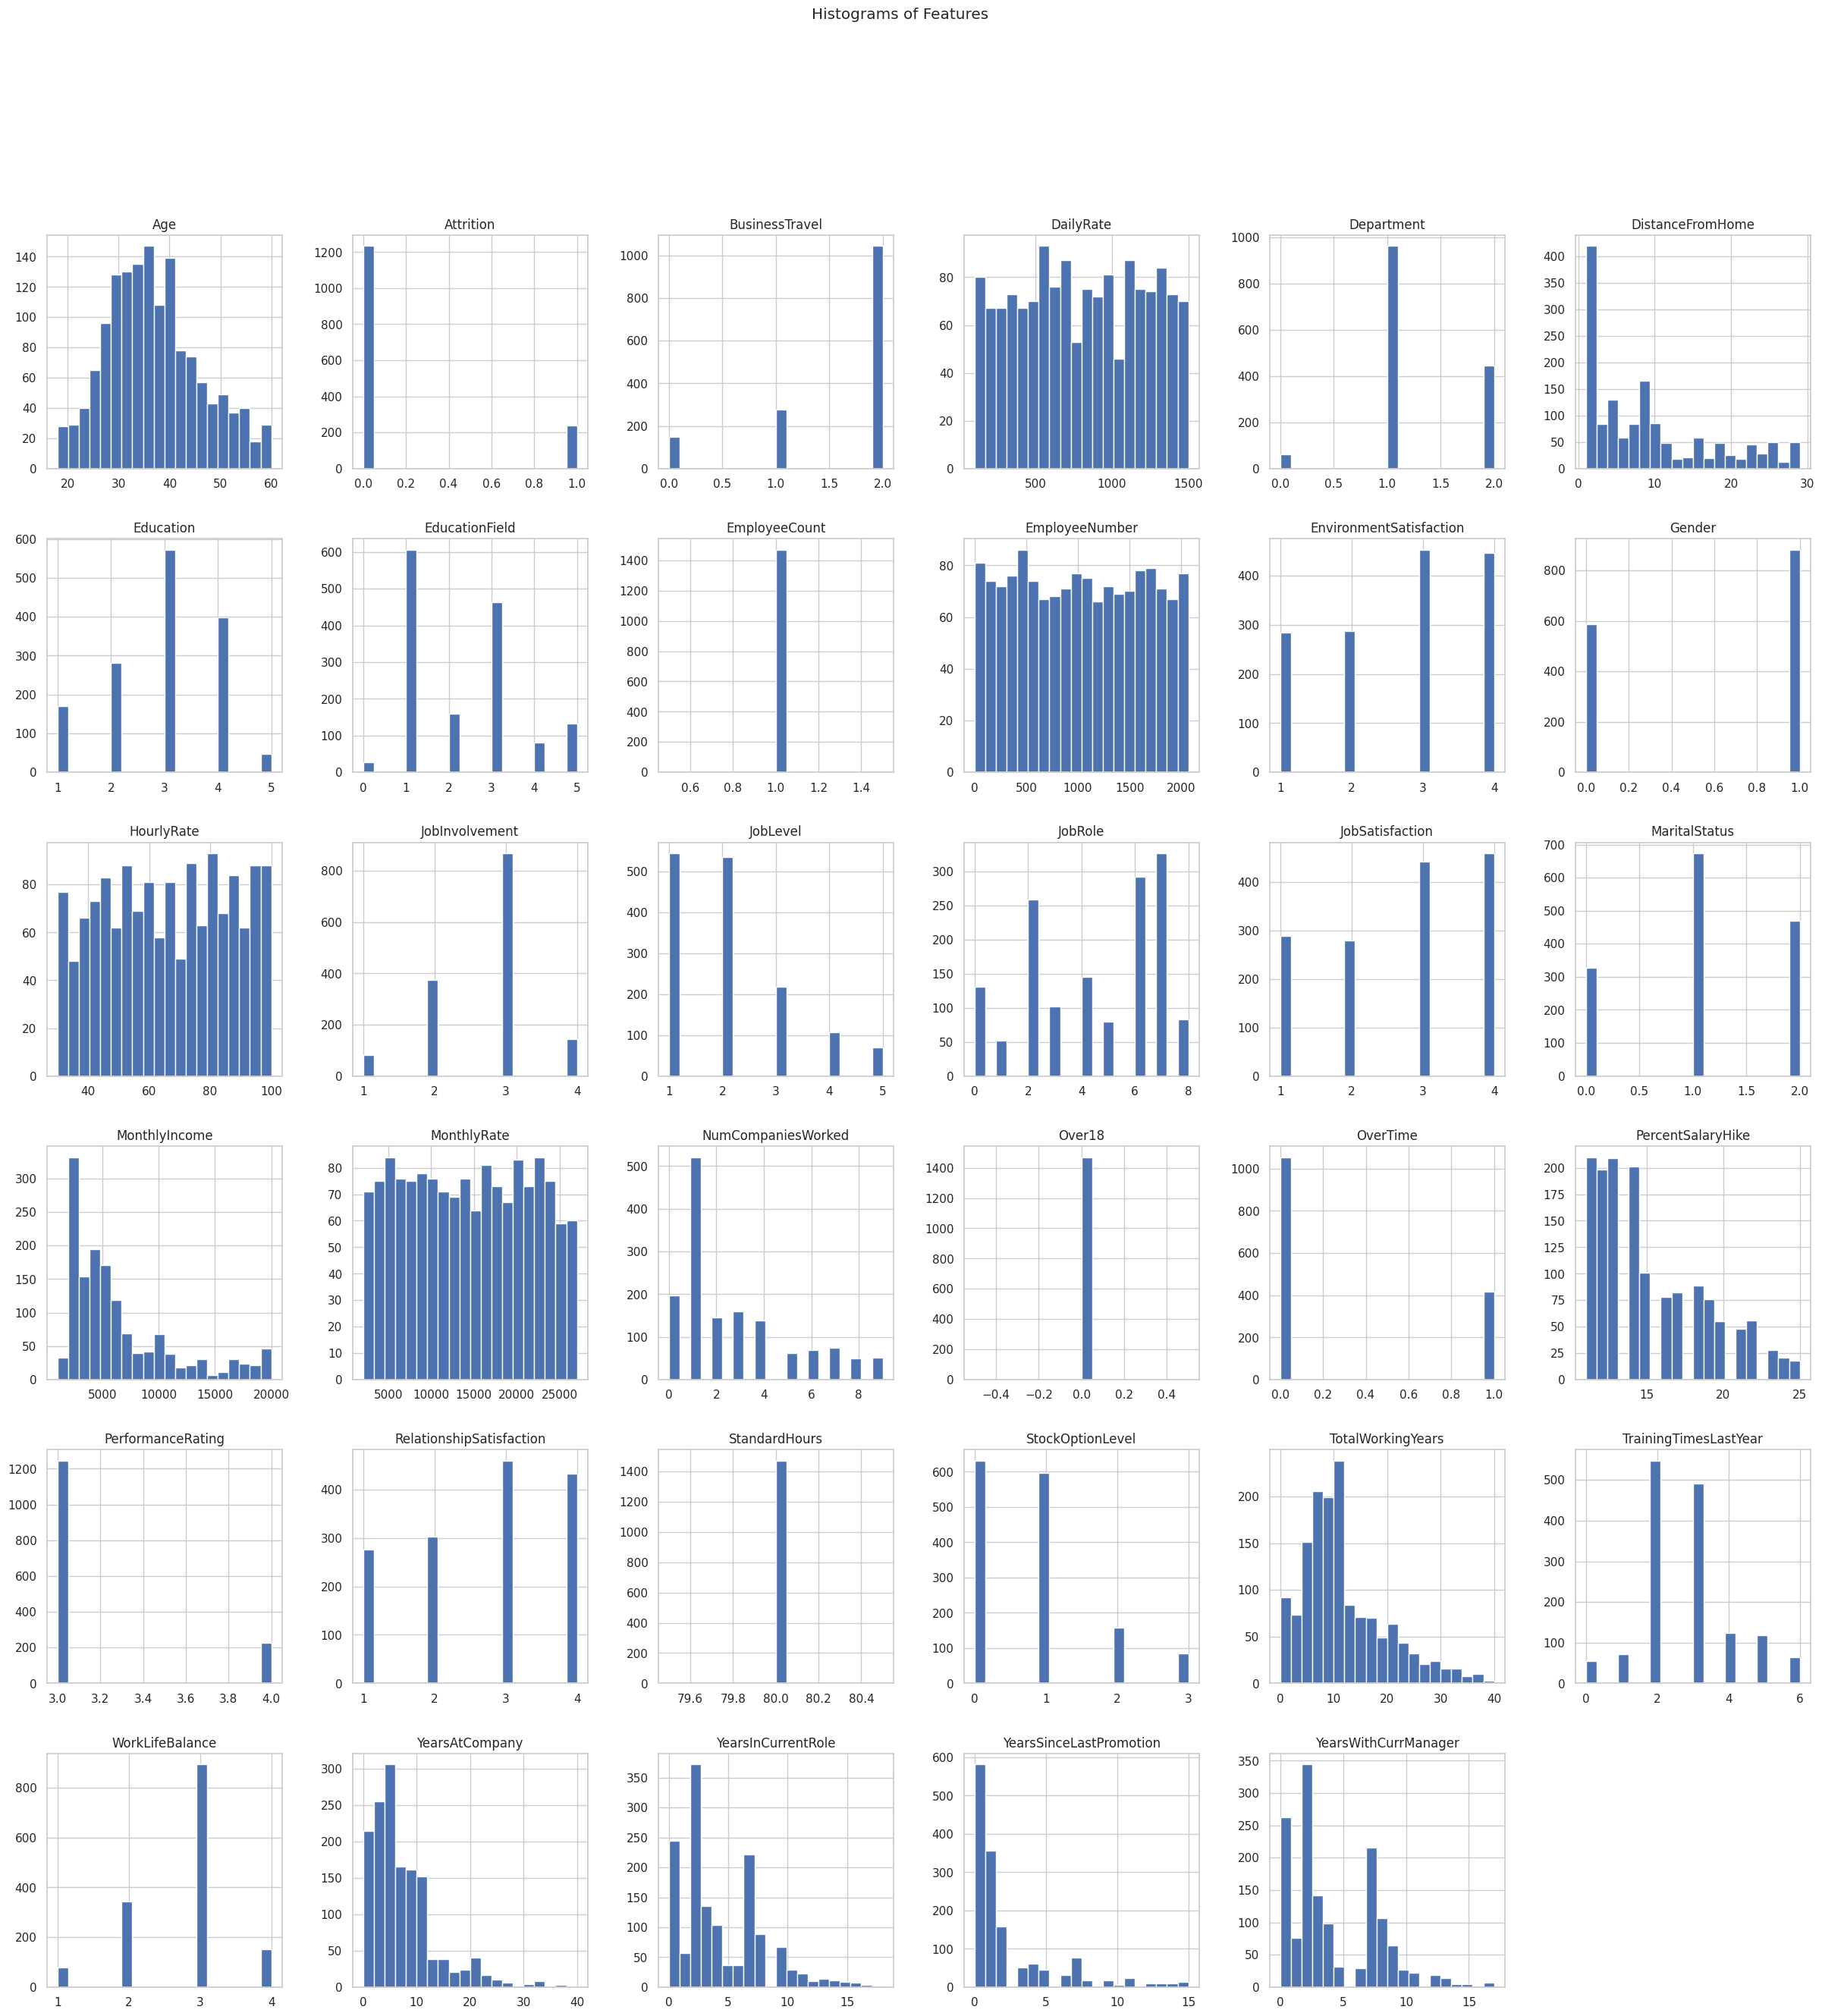

In [35]:
sns.set(style="whitegrid")

df_encoded[df_encoded.columns].hist(bins=20, figsize=(30, 30))
plt.suptitle('Histograms of Features')
plt.show()

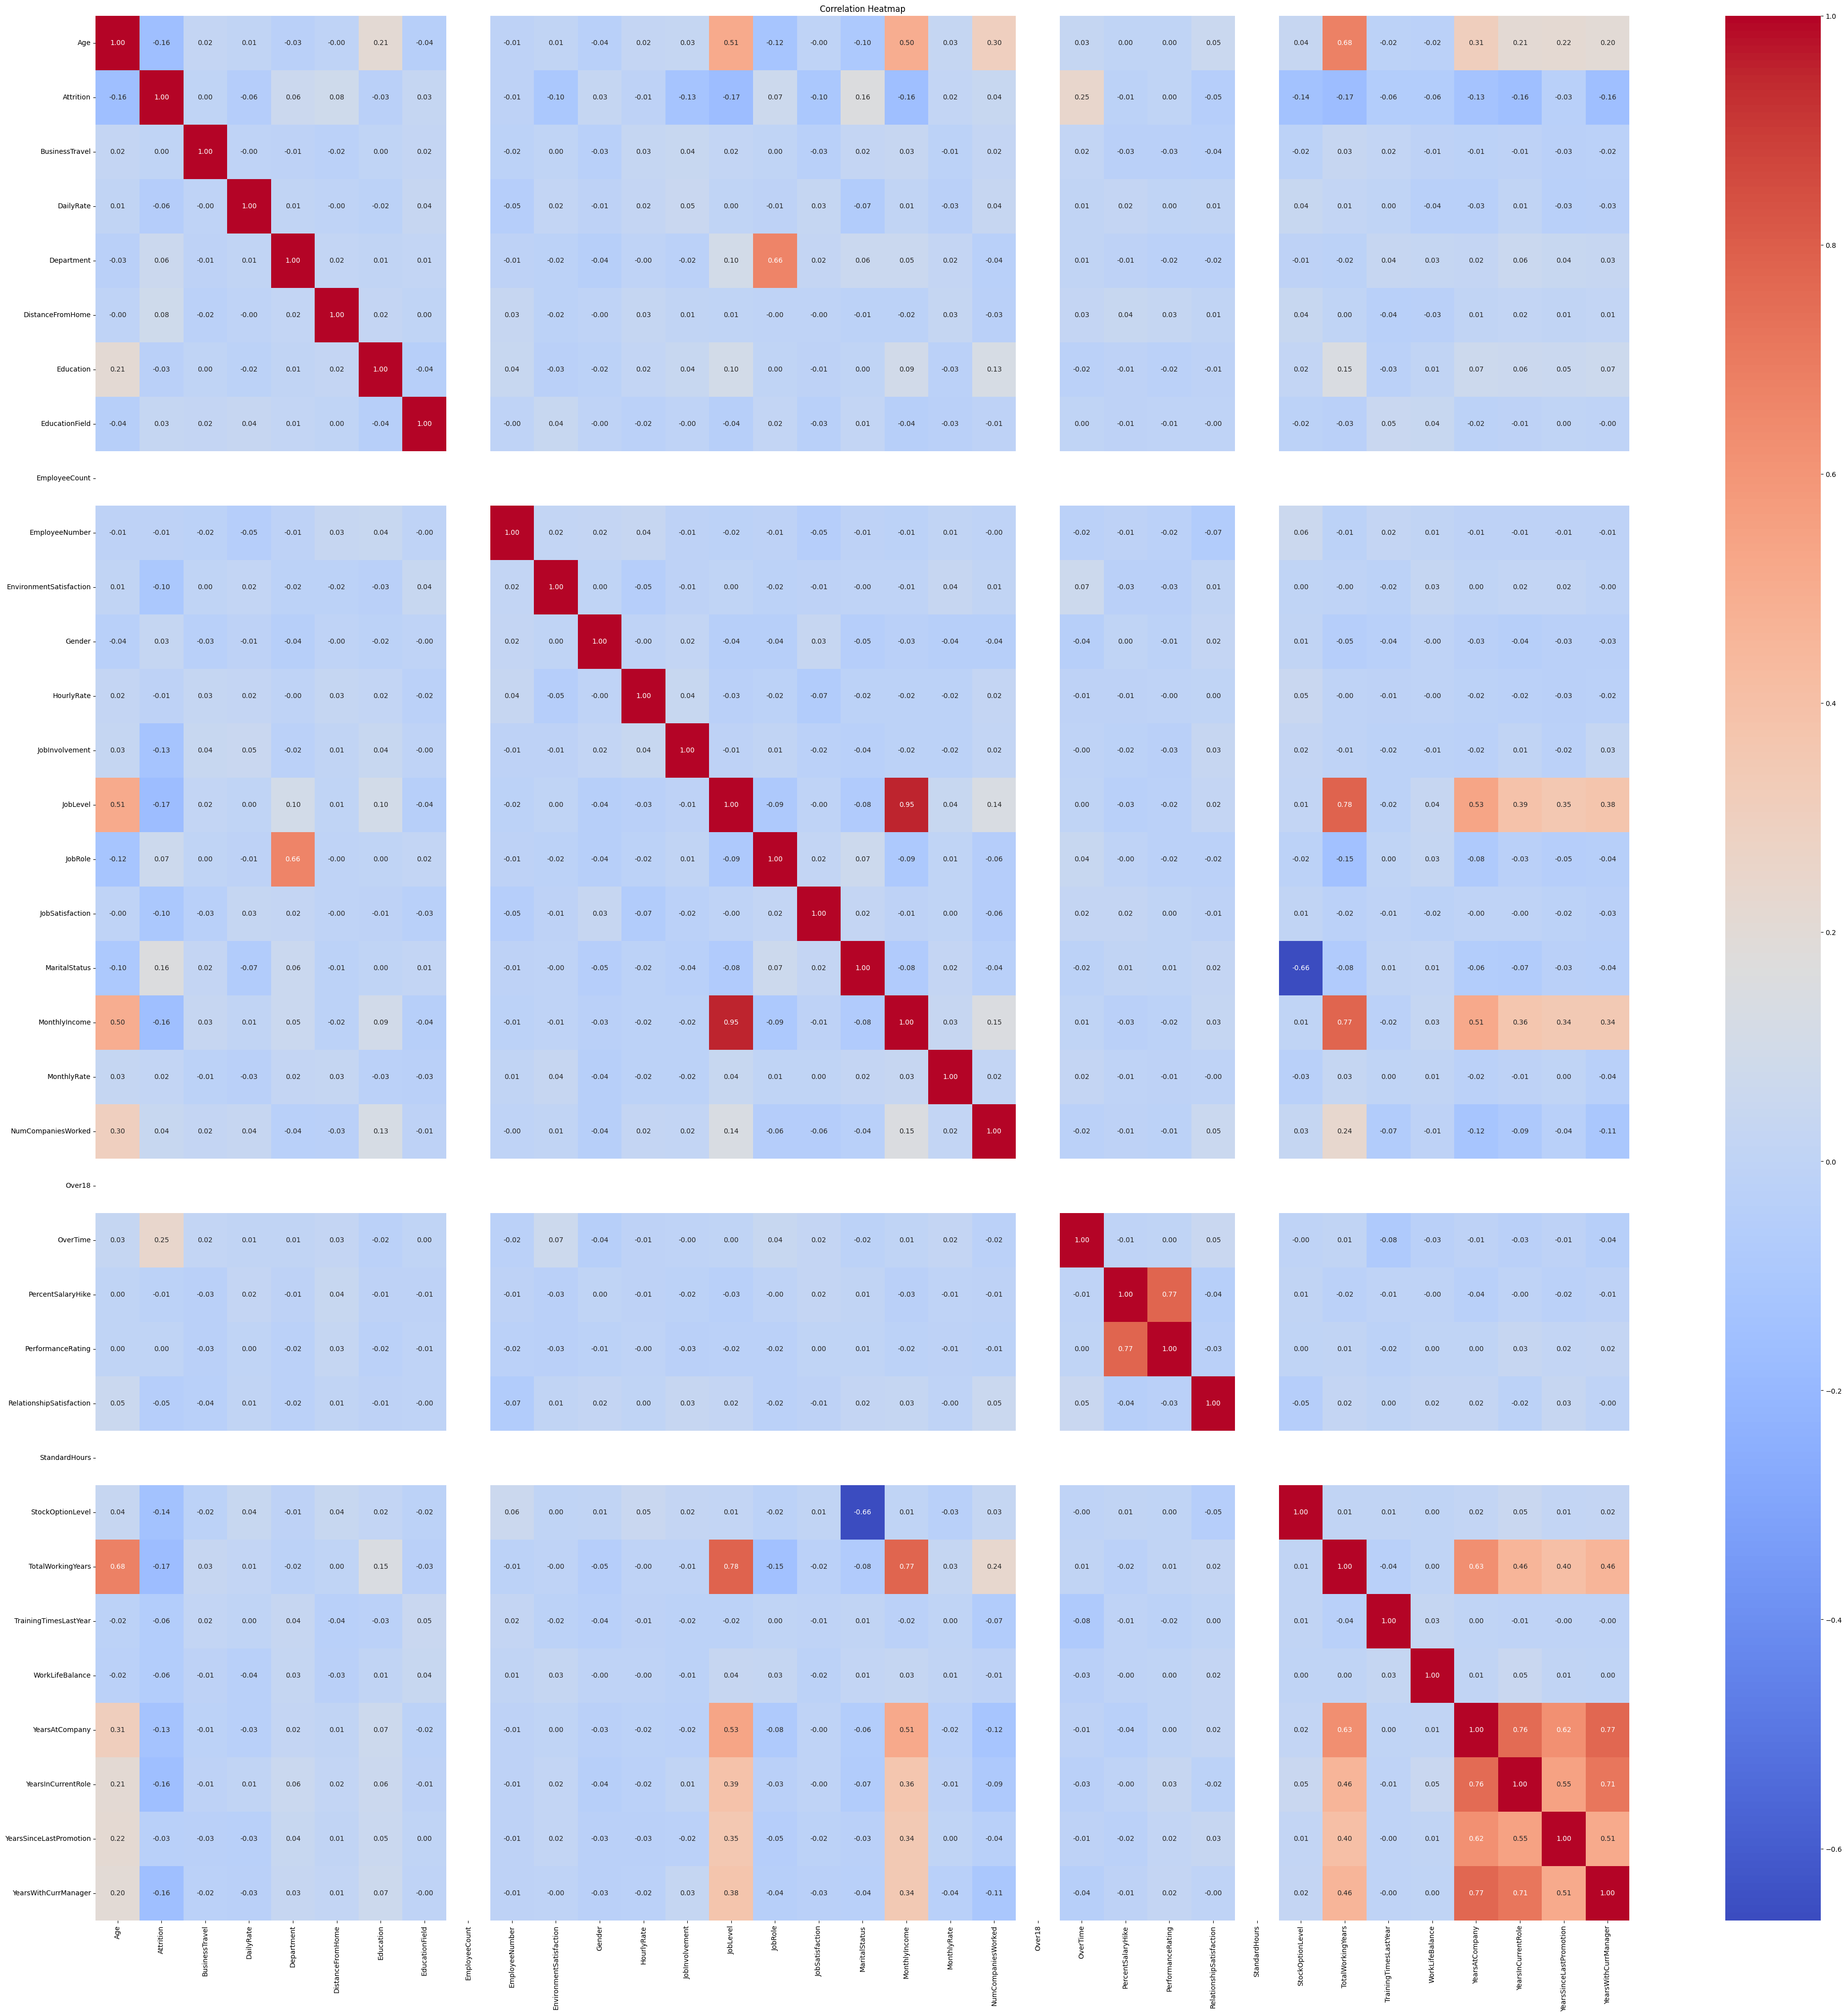

In [12]:
correlation_matrix = df_encoded.corr()

# Plot correlation heatmap using Seaborn
plt.figure(figsize=(50, 50))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()

In [13]:
X_ = df_encoded.drop(columns=['Attrition'])
Y_ = df_encoded['Attrition'] 

In [14]:
from sklearn.model_selection import train_test_split

# Split data into training and testing sets
X_train_, X_test_, Y_train_, Y_test_ = train_test_split(X_, Y_, test_size=0.2, random_state=42)

# Print the shapes of the training and testing sets
print("Training set - Features:", X_train_.shape, " Target:", Y_train_.shape)
print("Testing set - Features:", X_test_.shape, " Target:", Y_test_.shape)

Training set - Features: (1176, 34)  Target: (1176,)
Testing set - Features: (294, 34)  Target: (294,)


In [16]:
from sklearn.linear_model import LogisticRegression

logistic_model = LogisticRegression(max_iter=1000)

# Train the model on the training data
logistic_model.fit(X_train_, Y_train_)

# Predict the target variable for the test data
Y_pred_ = logistic_model.predict(X_test_)

# Evaluate the model
accuracy = accuracy_score(Y_test_, Y_pred_)
print("Accuracy:", accuracy)

# Get the classification report
print(classification_report(Y_test_, Y_pred_))

Accuracy: 0.8775510204081632
              precision    recall  f1-score   support

           0       0.88      0.99      0.93       255
           1       0.67      0.15      0.25        39

    accuracy                           0.88       294
   macro avg       0.78      0.57      0.59       294
weighted avg       0.86      0.88      0.84       294



/opt/conda/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


#### The above shows that the accuracy by executing the model on the data without any optimisation and feature engineering is 87.755%. Now the aim is to produce more accuracy by feature engineering.

## Feature Engineering and Optimisation

In [17]:
df_new = df_encoded.drop(columns=['EmployeeCount','StandardHours', 'EmployeeNumber','Over18'])

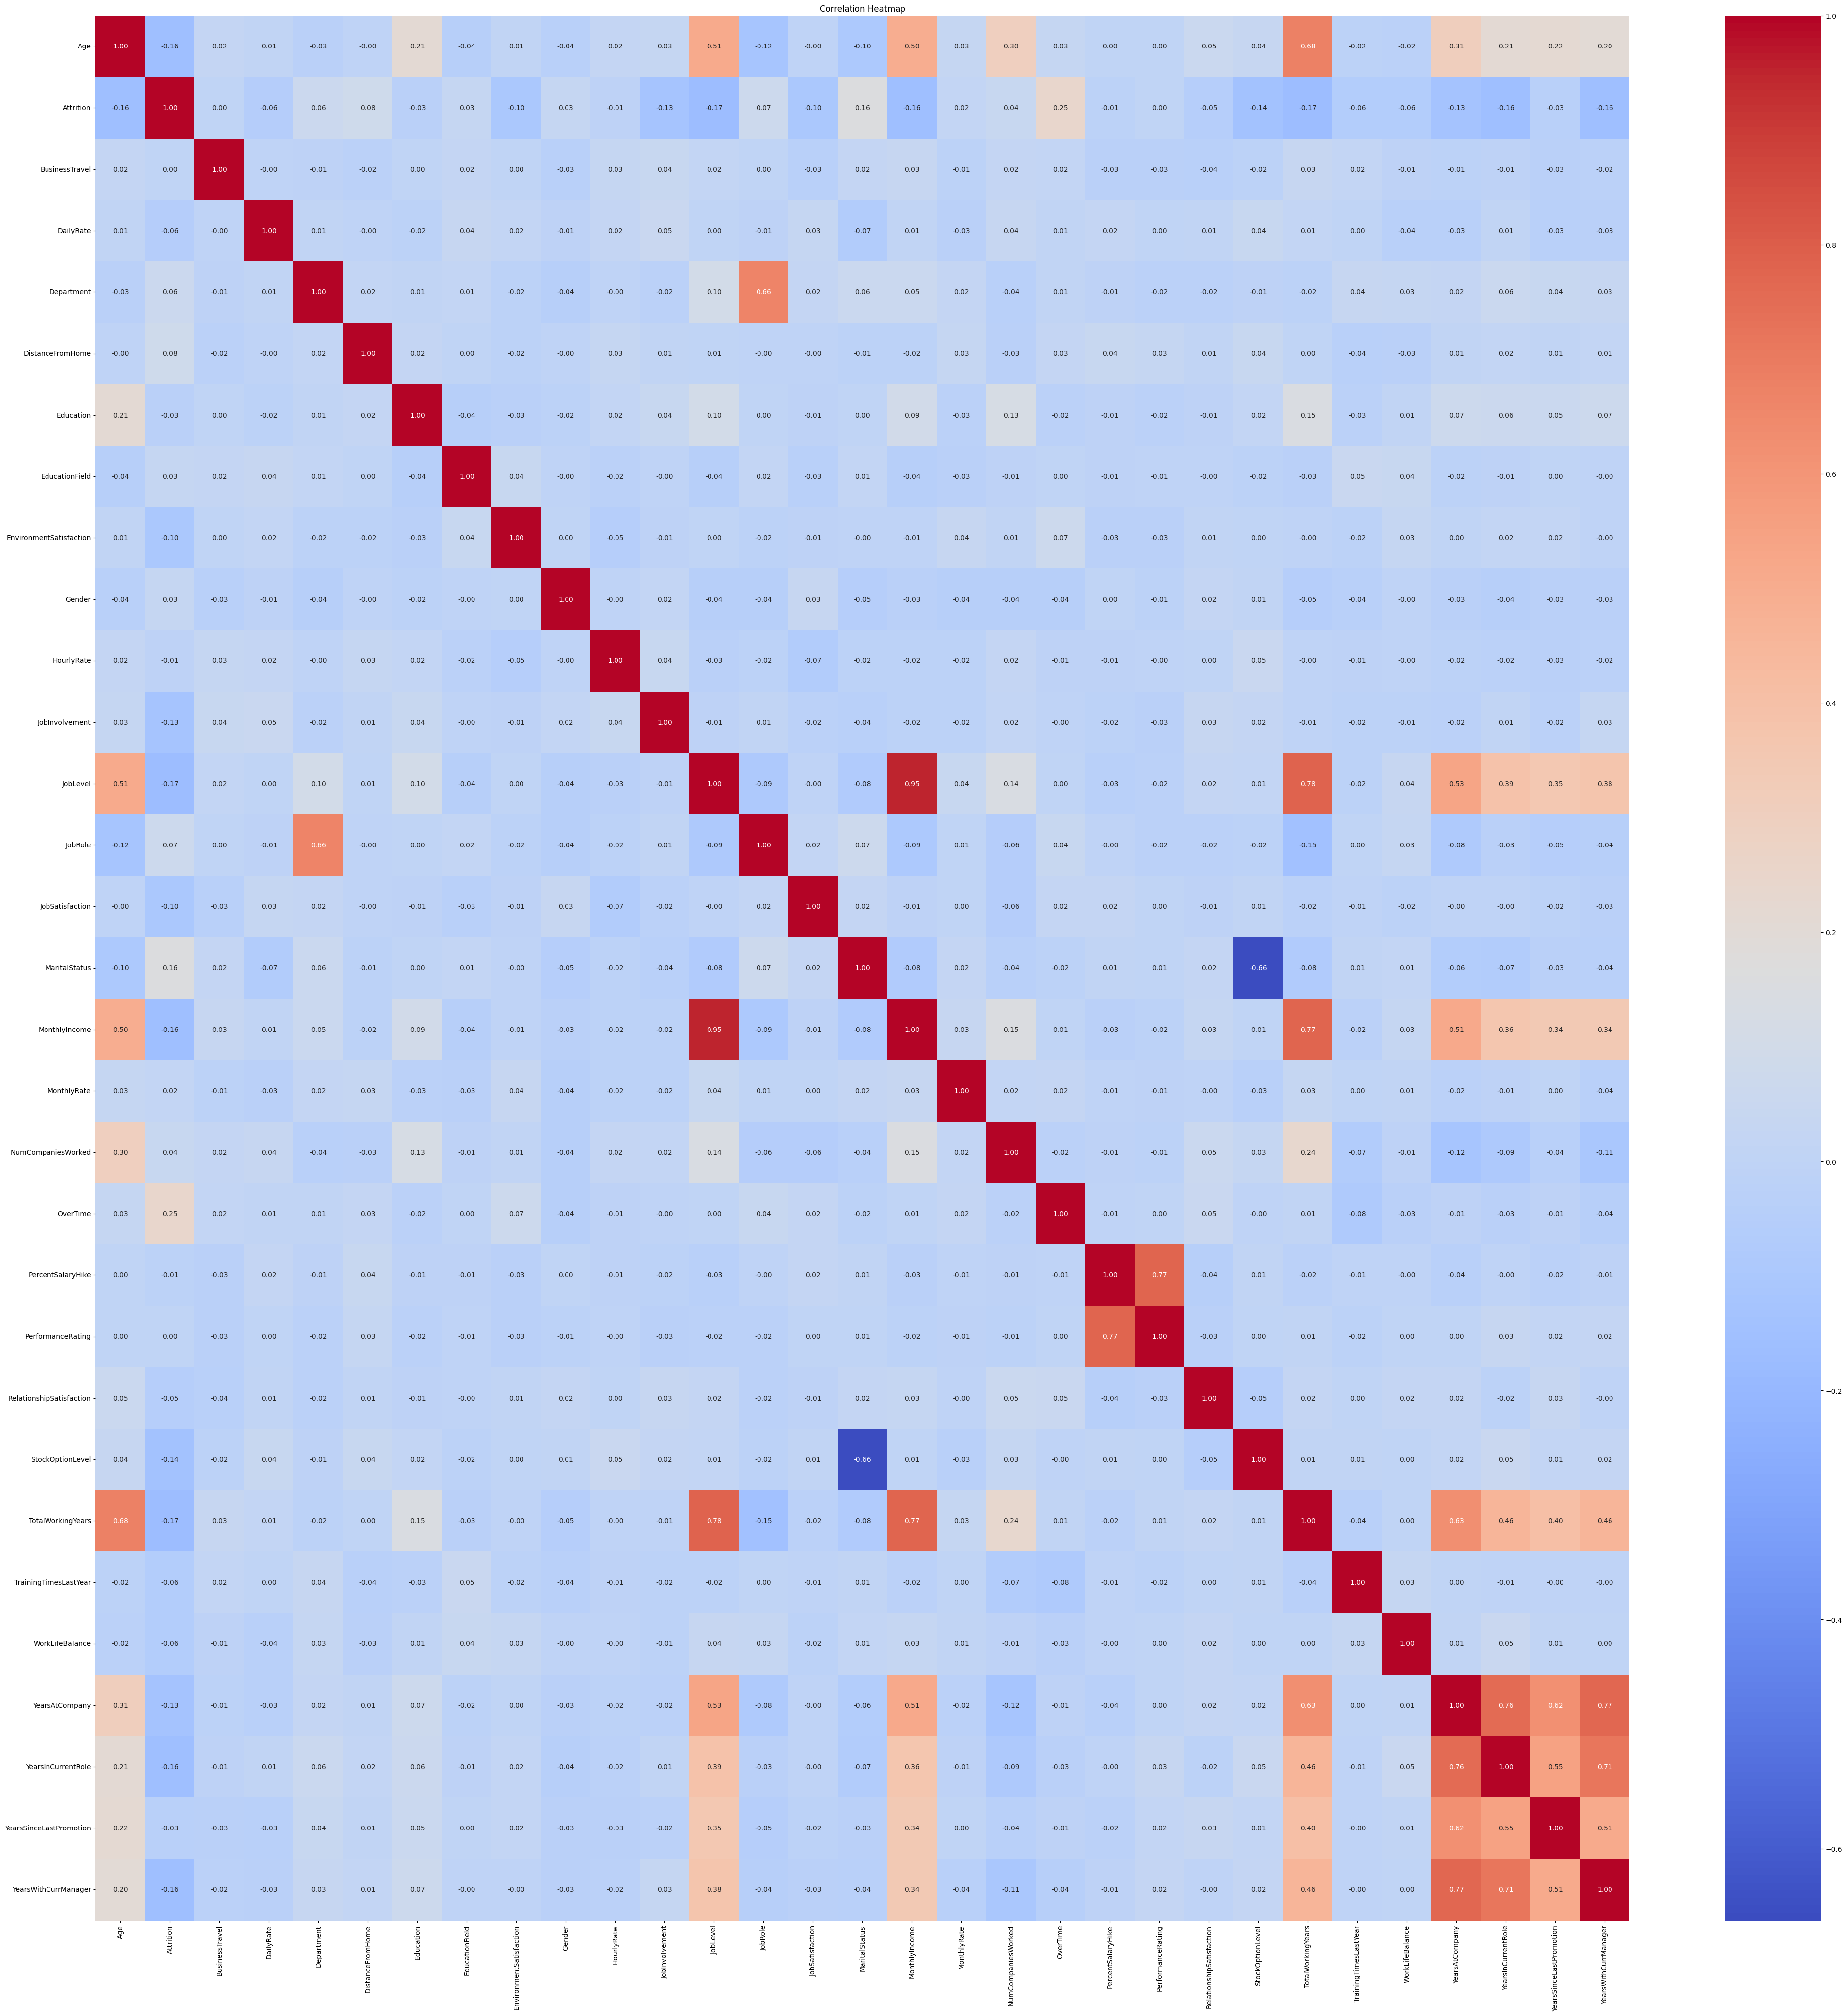

In [18]:
correlation_matrix = df_new.corr()

# Plot correlation heatmap using Seaborn
plt.figure(figsize=(50, 50))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()

In [19]:
df_new['job_moninc'] = np.log(df_new['JobLevel'] * df_new['MonthlyIncome'])
df_new = df_new.drop(columns=['JobLevel', 'MonthlyIncome'])


In [20]:
df_new['salhike_perfrate'] = np.log(df['PercentSalaryHike']) / np.log(df['PerformanceRating'])
df_new = df_new.drop(columns=['PercentSalaryHike', 'PerformanceRating'])

In [21]:
df_new.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField',
       'EnvironmentSatisfaction', 'Gender', 'HourlyRate', 'JobInvolvement',
       'JobRole', 'JobSatisfaction', 'MaritalStatus', 'MonthlyRate',
       'NumCompaniesWorked', 'OverTime', 'RelationshipSatisfaction',
       'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear',
       'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole',
       'YearsSinceLastPromotion', 'YearsWithCurrManager', 'job_moninc',
       'salhike_perfrate'],
      dtype='object')

In [22]:
df_new["job_moninc_workyrs"] = np.log(df_new['job_moninc'] + df_new['TotalWorkingYears'])
df_new = df_new.drop(columns=['TotalWorkingYears','job_moninc'])

In [23]:
df_new["yrscomp_rol_man"] = df_new['YearsWithCurrManager'] * df_new['YearsInCurrentRole'] * df_new['YearsAtCompany']
df_new["yrscomp_rol_man"] = df_new["yrscomp_rol_man"]/np.mean(df_new["yrscomp_rol_man"])
df_new = df_new.drop(columns = ['YearsWithCurrManager', 'YearsInCurrentRole', 'YearsAtCompany'])

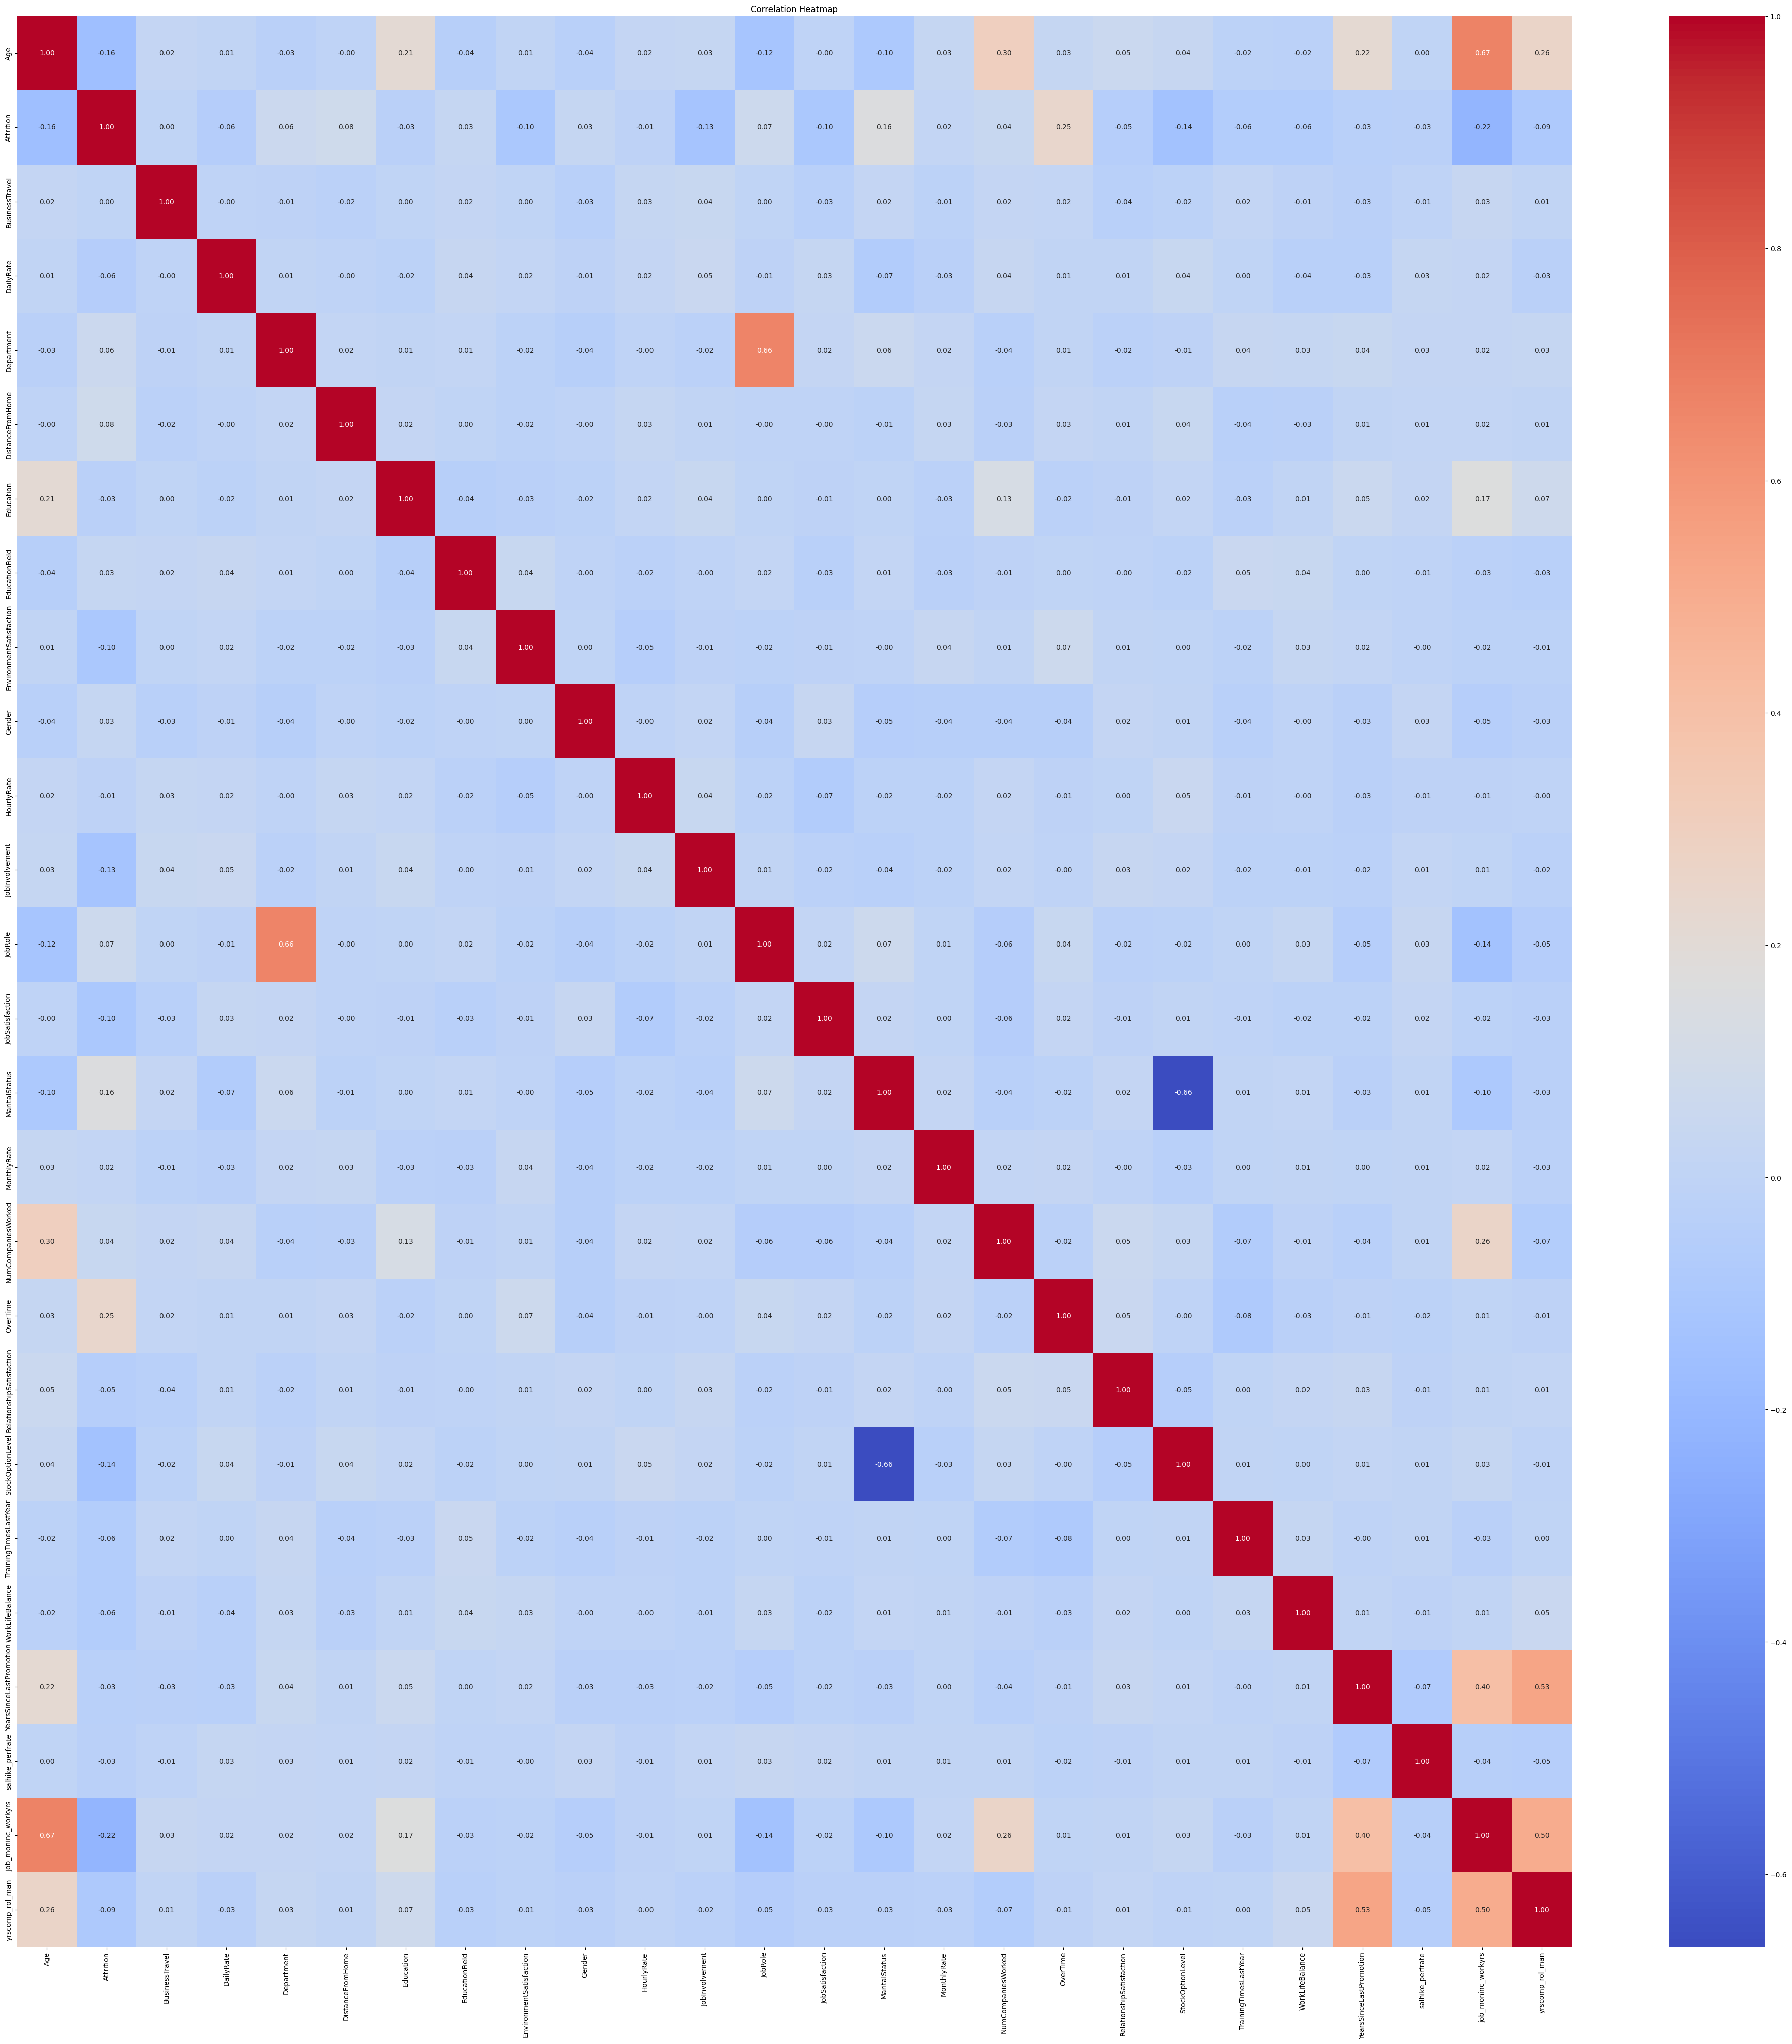

In [24]:
correlation_matrix = df_new.corr()

# Plot correlation heatmap using Seaborn
plt.figure(figsize=(50, 50))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()

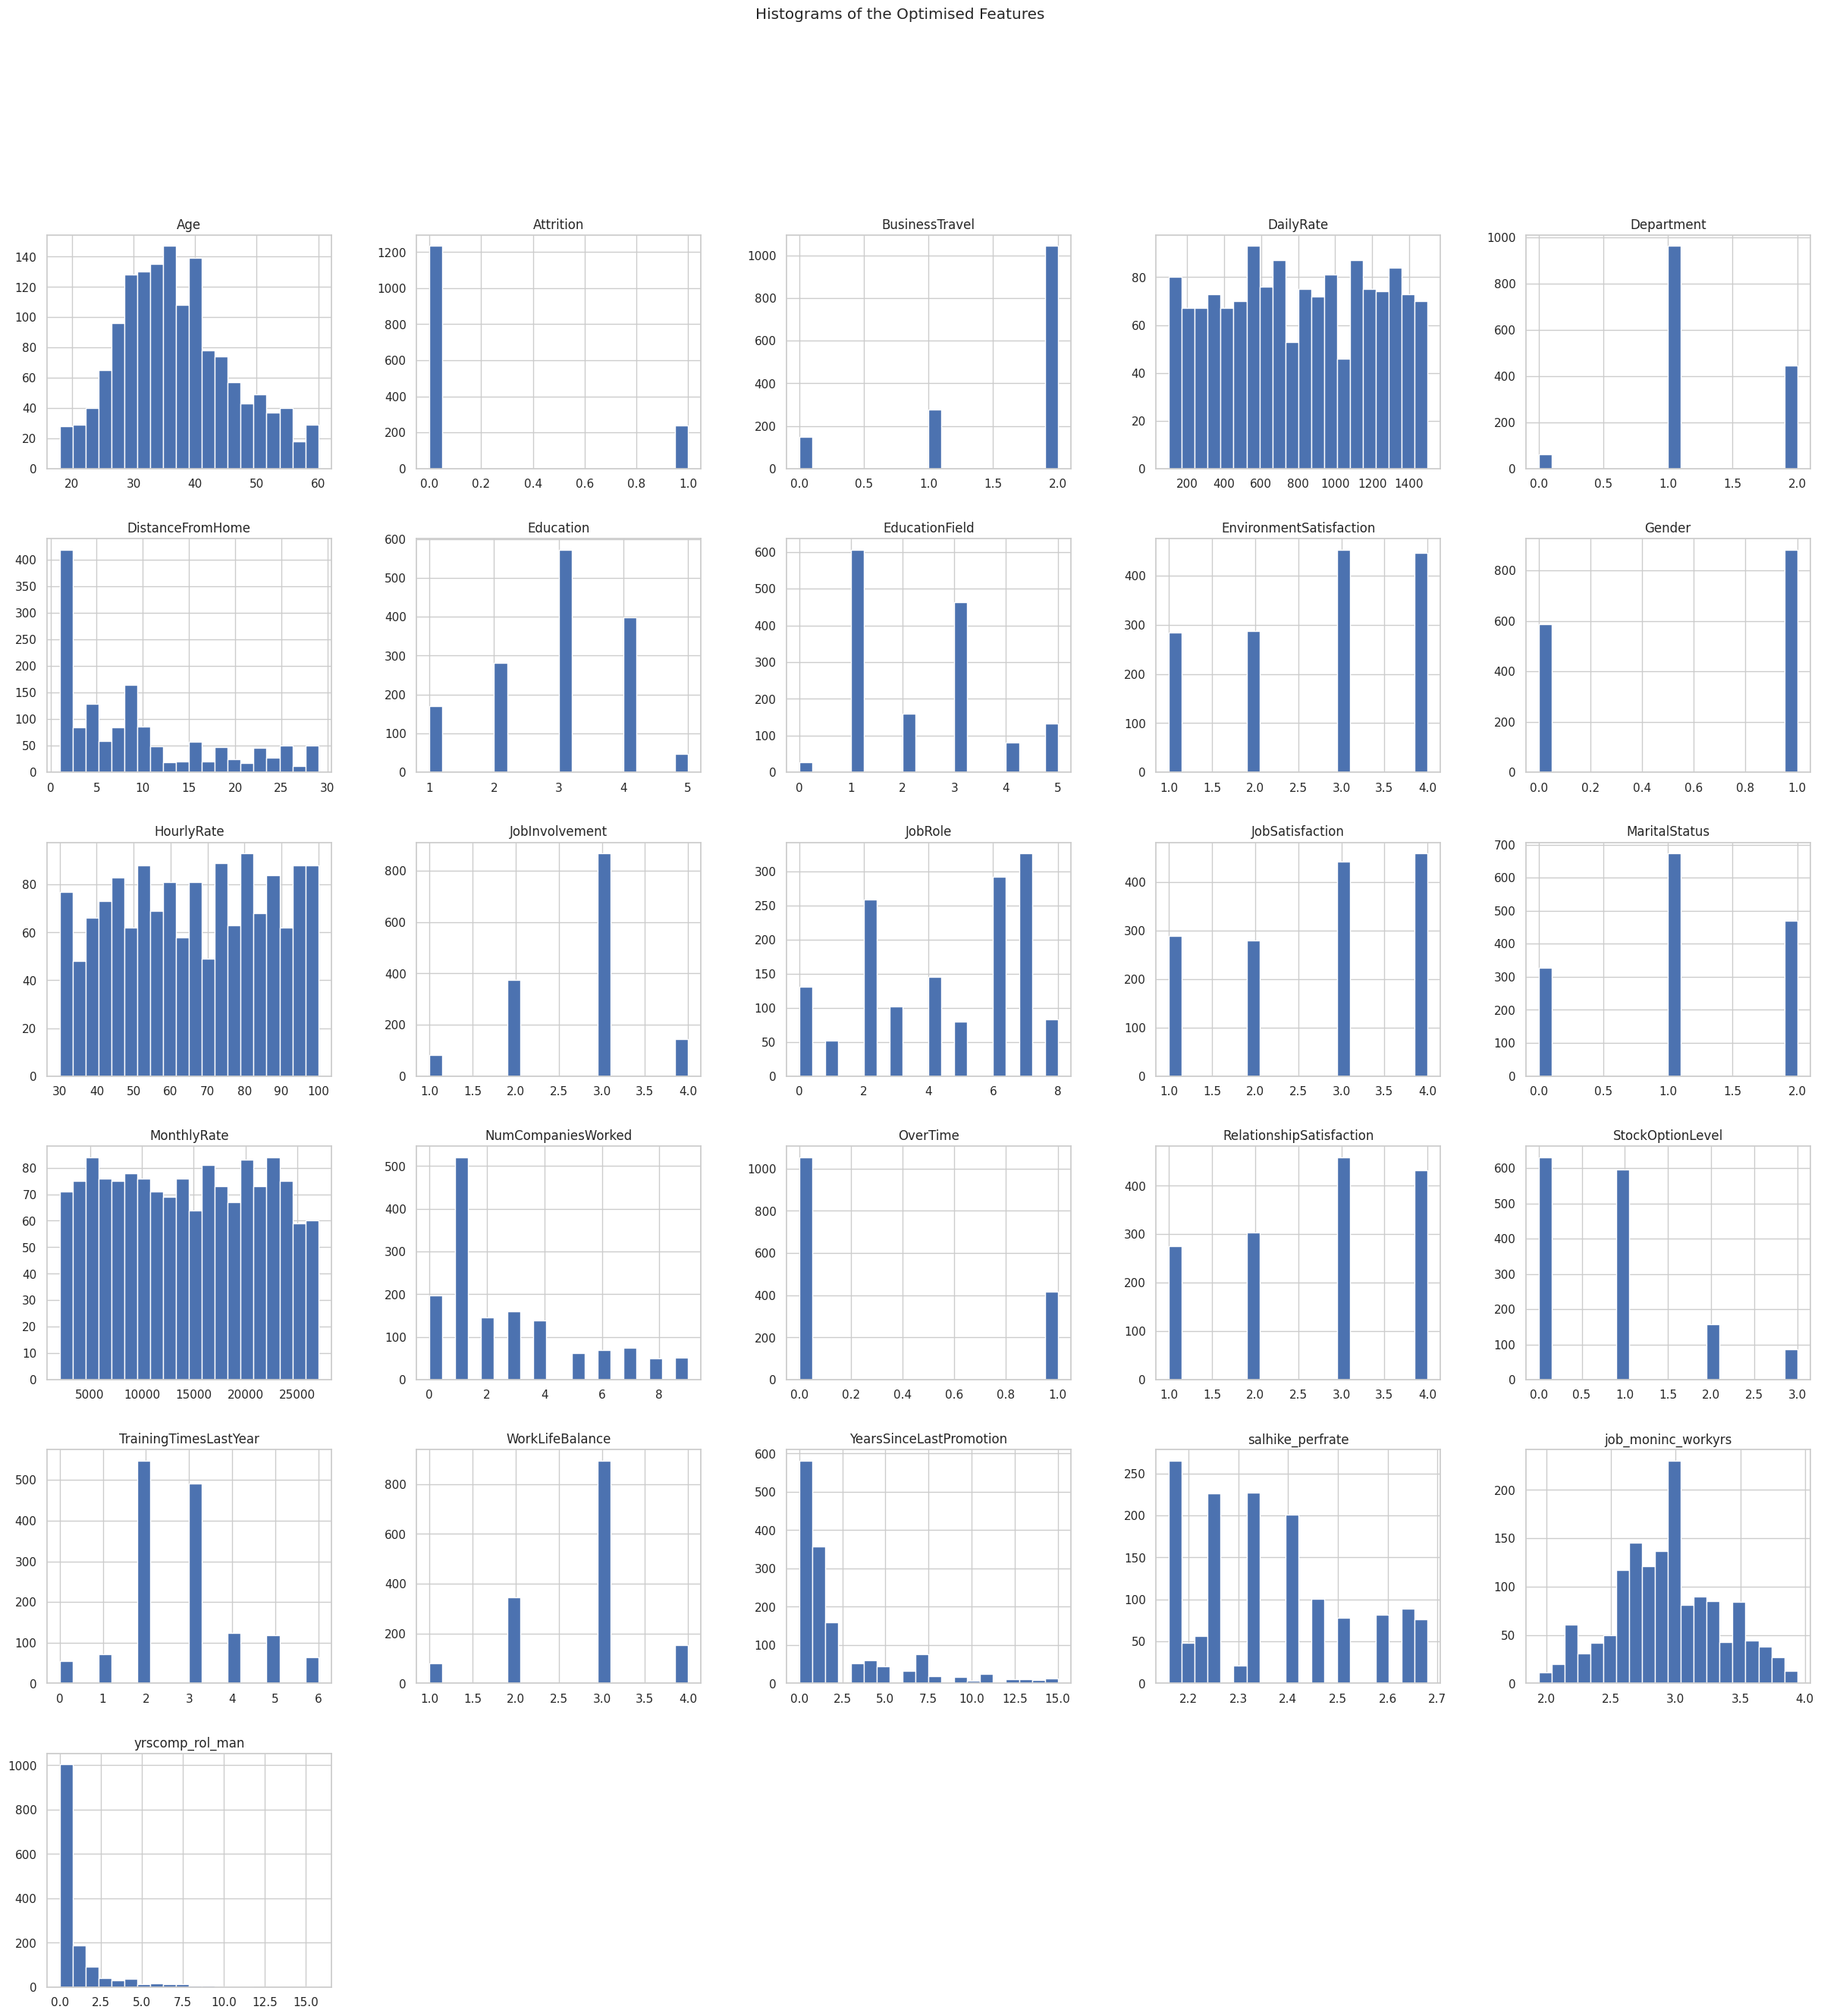

In [36]:
sns.set(style="whitegrid")

df_new[df_new.columns].hist(bins=20, figsize=(30, 30))
plt.suptitle('Histograms of the Optimised Features')
plt.show()

## Splitting the dataset to train and test

In [25]:
X = df_new.drop(columns=['Attrition'])
Y = df_new['Attrition'] 

In [26]:
X.head()

,Age,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,HourlyRate,...,NumCompaniesWorked,OverTime,RelationshipSatisfaction,StockOptionLevel,TrainingTimesLastYear,WorkLifeBalance,YearsSinceLastPromotion,salhike_perfrate,job_moninc_workyrs,yrscomp_rol_man
0,41,2,1102,2,1,2,1,2,0,94,...,8,1,1,0,0,1,0,2.182658,2.855981,0.336839
1,49,1,279,1,8,1,1,3,1,61,...,1,0,4,1,3,3,1,2.261781,2.956784,1.375424
2,37,2,1373,1,2,2,4,4,1,92,...,6,1,2,0,3,3,0,2.464974,2.684093,0.000000
3,33,1,1392,1,3,4,1,4,0,56,...,1,1,3,0,3,3,3,2.182658,2.771060,0.000000
4,27,2,591,1,2,1,3,1,1,40,...,9,0,4,1,3,3,2,2.261860,2.649809,0.022456


In [27]:
from sklearn.model_selection import train_test_split

# Split data into training and testing sets
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

# Print the shapes of the training and testing sets
print("Training set - Features:", X_train.shape, " Target:", Y_train.shape)
print("Testing set - Features:", X_test.shape, " Target:", Y_test.shape)

Training set - Features: (1176, 25)  Target: (1176,)
Testing set - Features: (294, 25)  Target: (294,)


## Using Random Forest

In [28]:
from sklearn.ensemble import RandomForestClassifier

random_forest_model = RandomForestClassifier(n_estimators=100)

# Train the model on the training data
random_forest_model.fit(X_train, Y_train)

# Predict the target variable for the test data
Y_pred_rf = random_forest_model.predict(X_test)

# Evaluate the model
accuracy_rf = accuracy_score(Y_test, Y_pred_rf)
print("Accuracy for Random Forest:", accuracy_rf)

# Get the classification report
print(classification_report(Y_test, Y_pred_rf))

Accuracy for Random Forest: 0.8843537414965986
              precision    recall  f1-score   support

           0       0.88      1.00      0.94       255
           1       1.00      0.13      0.23        39

    accuracy                           0.88       294
   macro avg       0.94      0.56      0.58       294
weighted avg       0.90      0.88      0.84       294



## Using Logistic Regression

In [29]:
from sklearn.linear_model import LogisticRegression

In [30]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [31]:
logistic_model = LogisticRegression(max_iter=1000)

# Train the model on the training data
logistic_model.fit(X_train_scaled, Y_train)

# Predict the target variable for the test data
Y_pred = logistic_model.predict(X_test_scaled)

# Evaluate the model
accuracy = accuracy_score(Y_test, Y_pred)
print("Accuracy:", accuracy)

# Get the classification report
print(classification_report(Y_test, Y_pred))

Accuracy: 0.9013605442176871
              precision    recall  f1-score   support

           0       0.92      0.98      0.94       255
           1       0.73      0.41      0.52        39

    accuracy                           0.90       294
   macro avg       0.82      0.69      0.73       294
weighted avg       0.89      0.90      0.89       294



## Using Desicion Tree Classifier

In [32]:
from sklearn.tree import DecisionTreeClassifier

clf = DecisionTreeClassifier(random_state = 42)

# Train the classifier on the training data
clf.fit(X_train, Y_train)

# Make predictions on the testing data
Y_pred_clf = clf.predict(X_test)

# Calculate accuracy score
accuracy = accuracy_score(Y_test, Y_pred_clf)
print("Accuracy:", accuracy)

Accuracy: 0.8027210884353742


#### From the above we can see that the logistic regression produces more accuracy than the other models. The accuracy that the logistic regression produces is 90.136%.